In [1]:
import sys
import matplotlib.pyplot as plt

sys.path.append('..')
sys.path.append('.')

from src.utils.data_utils import get_cifar_data
from src.main.main import run_single_experiment
from inspect import signature

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

Using TensorFlow backend.


## Use CIFAR-10 image data for experiments

In [2]:
(x_train, y_train), (x_test, y_test) = get_cifar_data()

## Examine a few sampels of the data

<Figure size 432x288 with 0 Axes>

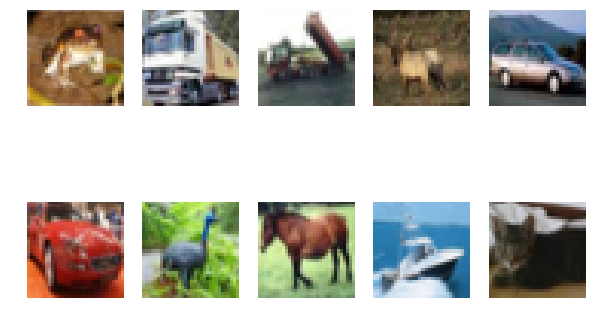

In [3]:
n_samples=10
plt.figure()
plt.figure(figsize=(10, 10))
for i in range(n_samples):
    ax = plt.subplot(n_samples // 5 + 1, 5, i + 1)
    plt.imshow(x_train[i,:])
    ax.axis('off')
plt.show()

## Set our experimental parameters

In [6]:
data_samples = None
monte_carlo_samples = 25

In [7]:
y_true, prediction_df, stochastic_predictions = run_single_experiment(data_samples,
                                                                     monte_carlo_samples)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 59s 1ms/step - loss: 1.6666 - acc: 0.4072 - val_loss: 1.3934 - val_acc: 0.5132
Epoch 2/10
45000/45000 [==============================] - 66s 1ms/step - loss: 1.3085 - acc: 0.5327 - val_loss: 1.2242 - val_acc: 0.5784
Epoch 3/10
45000/45000 [==============================] - 62s 1ms/step - loss: 1.1908 - acc: 0.5770 - val_loss: 1.1594 - val_acc: 0.5902
Epoch 4/10
45000/45000 [==============================] - 67s 1ms/step - loss: 1.1232 - acc: 0.6059 - val_loss: 1.4202 - val_acc: 0.5398
Epoch 5/10
45000/45000 [==============================] - 71s 2ms/step - loss: 1.0809 - acc: 0.6176 - val_loss: 1.0780 - val_acc: 0.6336
Epoch 6/10
45000/45000 [==============================] - 62s 1ms/step - loss: 1.0365 - acc: 0.6348 - val_loss: 1.1645 - val_acc: 0.5984
Epoch 7/10
45000/45000 [==============================] - 68s 2ms/step - loss: 1.0115 - acc: 0.6414 - val_loss: 1.0405 - val_acc:

../src/controller/train_model.py:95: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  stoch_preds.set_value(index=i, col=0, value=Yt_hat[:, 0, i, 0].mean())
../src/controller/train_model.py:96: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  stoch_preds.set_value(index=i, col=1, value=Yt_hat[:, 0, i, 1].mean())
../src/controller/train_model.py:97: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  stoch_preds.set_value(index=i, col=2, value=Yt_hat[:, 0, i, 2].mean())
../src/controller/train_model.py:98: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  stoch_preds.set_value(index=i, col=3, value=Yt_hat[:, 0, i, 3].mean())
../src/controller/train_model.py:99: FutureWarning: set_valu

Standard confusion matrix: 
 col_0    0    1    2    3    4    5    6    7    8    9
row_0                                                  
0      549    5   69   43  116   10   33   29   64   82
1        9  562    4   18   21    5   45   12   34  290
2       30    2  389   45  262   69  160   27    8    8
3        5    3   41  430  165  130  171   33    8   14
4        7    0   13   21  823   19   65   43    6    3
5        1    0   32  163  143  538   60   47    6   10
6        1    0    7   37   68    8  867    6    2    4
7        3    0   15   24  140   53   20  727    6   12
8       33   17   12   27   42    3   27    5  772   62
9       11   14    4   13   29    3   15   16   15  880
Bayesian confusion matrix: 
 col_0    0    1    2    3    4    5    6    7    8    9
row_0                                                  
0      760   17   65   17   27    3   12   21   41   37
1       21  818    6   11    2    2   10    5   25  100
2       71    5  611   48  106   33   76   29 

## Plot precision recall curves for a given target class (0-9)

In [11]:
def get_pr_curves(target_class):
    
    indicator_list = [1 if x == target_class else 0 for x in y_true]
    
    precision, recall, _ = precision_recall_curve(indicator_list,
                                                prediction_df[target_class],
                                                pos_label=1)
    precision_stoch, recall_stoch, _ = precision_recall_curve(indicator_list,
                               stochastic_predictions[target_class],
                               pos_label=1)

    average_precision = average_precision_score(indicator_list,
                                                prediction_df[target_class])

    average_precision_stoch = average_precision_score(indicator_list,
                                                      stochastic_predictions[target_class])
    
    return recall, precision, recall_stoch, precision_stoch, average_precision, average_precision_stoch

In [12]:
n_targets = len(y_true.unique())

<Figure size 432x288 with 0 Axes>

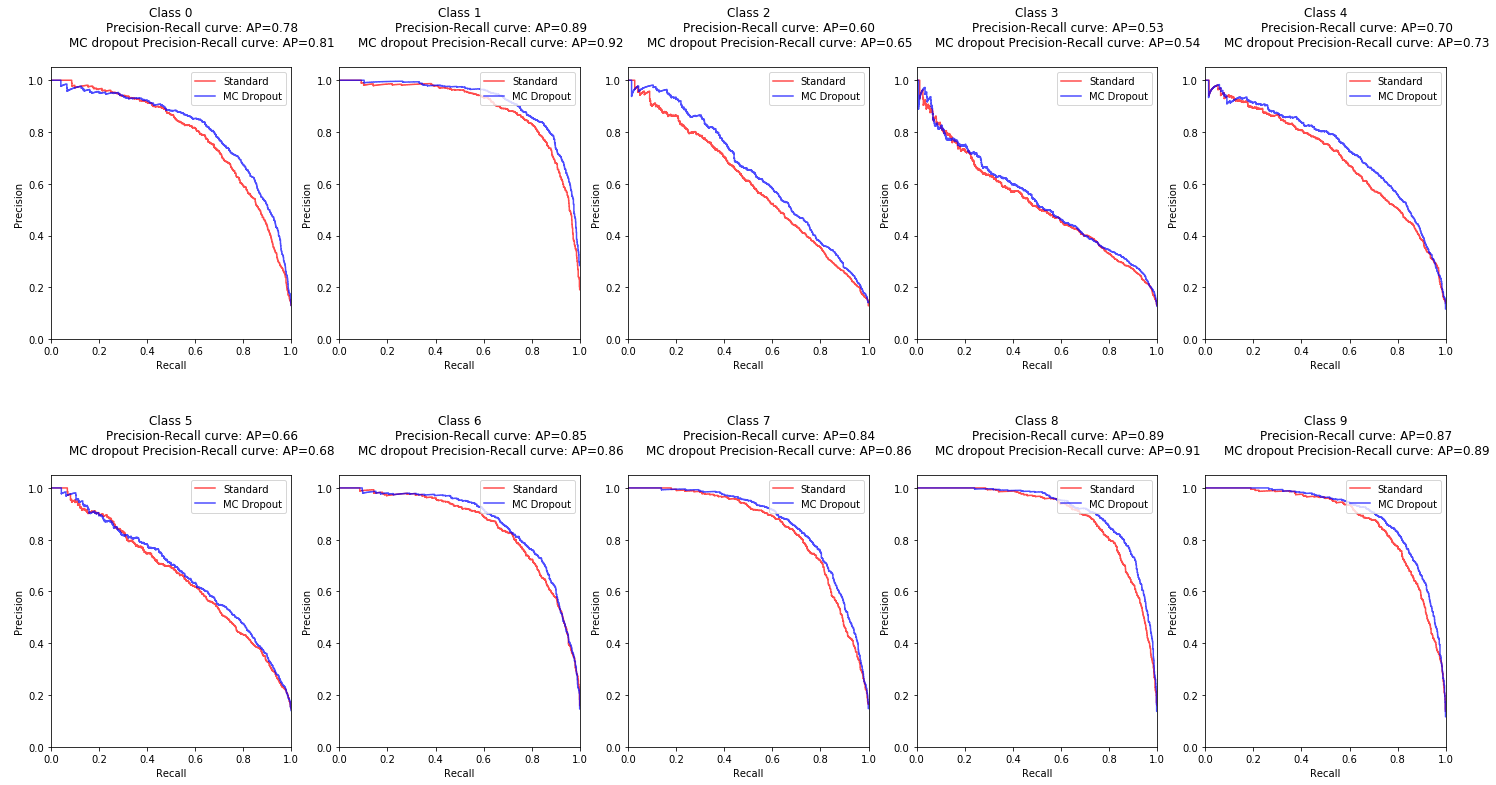

In [13]:
plt.figure()
plt.figure(figsize=(25, 20))
for i in range(n_targets):
    ax = plt.subplot(n_targets // 5 + 1, 5, i + 1)
    plt.subplots_adjust(hspace=0.5)
    
    recall, precision, recall_stoch, precision_stoch, average_precision, average_precision_stoch= get_pr_curves(i)
    
    plt.step(recall, precision, color='r', alpha=0.7,
         where='post', label = "Standard")

    plt.step(recall_stoch, precision_stoch, color='b', alpha=0.7,
             where='post', label = "MC Dropout")


    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title("""Class {0}
                Precision-Recall curve: AP={1:0.2f}
                MC dropout Precision-Recall curve: AP={2:0.2f}\n""".format(
              i, average_precision, average_precision_stoch), fontsize=12)
    plt.legend(loc='upper right')

    plt.savefig('class8.png')

plt.show()